<a href="https://colab.research.google.com/github/derivai7/PCVK_Ganjil_2023/blob/main/Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

In [99]:
import cv2
import numpy as np
import os
import pytesseract
from matplotlib import pyplot as plt
from pytesseract import Output
from PIL import Image

In [100]:
def preprocess_image(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((5, 5), np.uint8)
    opened_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

    return opened_image


Processing images in folder: InfinixHot11


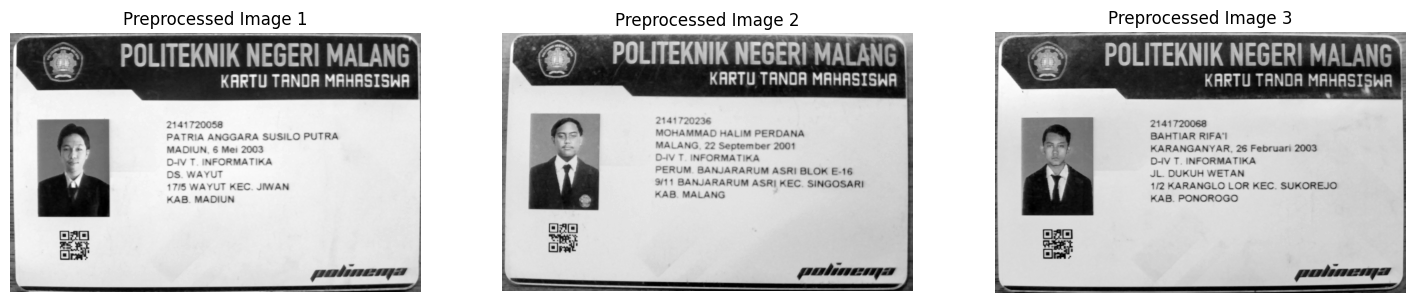


Processing images in folder: AsusZenfone9


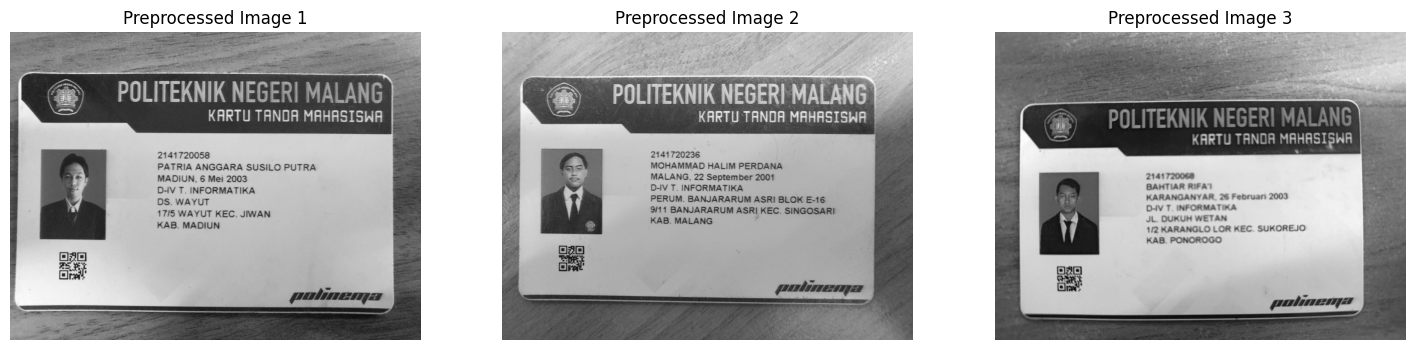


Processing images in folder: SamsungA32


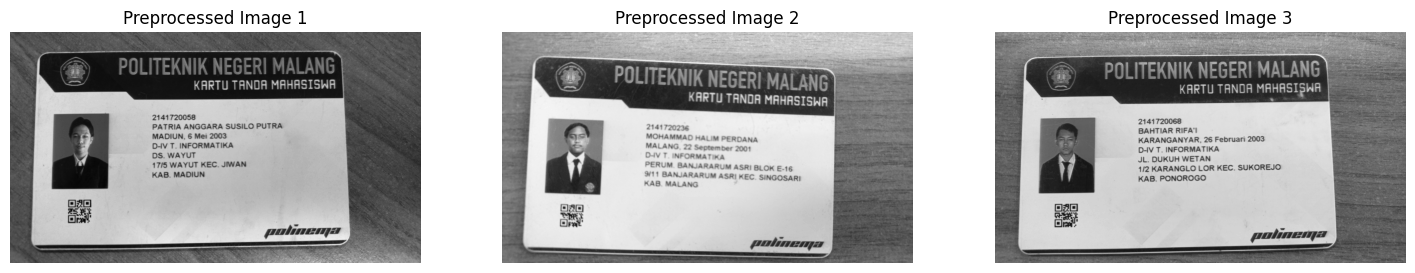

In [101]:
main_folder_path = '/content/drive/MyDrive/Dataset/'

for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    if os.path.isdir(folder_path):
        print(f"\nProcessing images in folder: {folder_name}")

        plt.figure(figsize=(18, 6))

        for idx, filename in enumerate(os.listdir(folder_path)):
            file_path = os.path.join(folder_path, filename)

            original_image = cv2.imread(file_path)

            preprocessed_img = preprocess_image(original_image)

            plt.subplot(1, 3, idx + 1)
            plt.imshow(preprocessed_img, cmap='gray')
            plt.title(f'Preprocessed Image {idx + 1}')
            plt.axis('off')

        plt.show()

In [102]:
def detect_text(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return pytesseract.image_to_string(image_rgb,  lang="ind")

def detect_and_draw_boxes(image, confidence_threshold=60):
  image_with_boxes = image.copy()

  d = pytesseract.image_to_data(preprocess_image(image), output_type=Output.DICT)
  n_boxes = len(d['text'])

  for i in range(n_boxes):
    if int(d['conf'][i]) > confidence_threshold:
       (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])

       image_with_boxes = cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

  b, g, r = cv2.split(image_with_boxes)
  return cv2.merge([r, g, b])


Detected images in folder: InfinixHot11


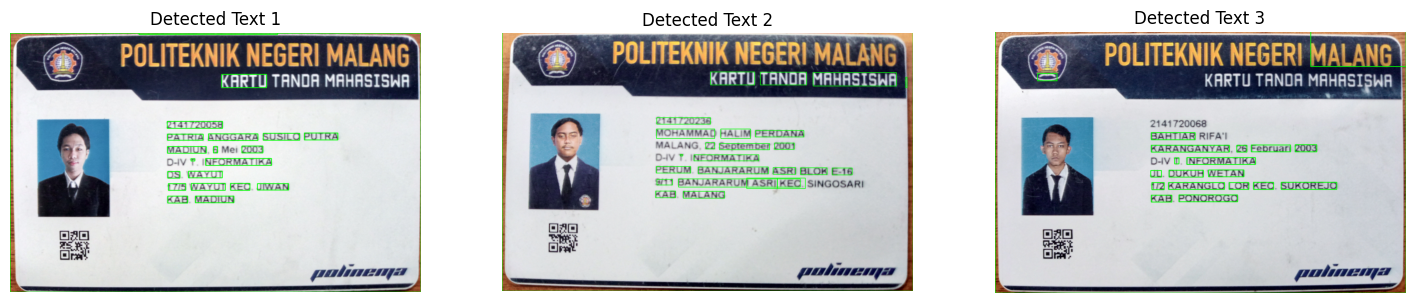


Detected images in folder: AsusZenfone9


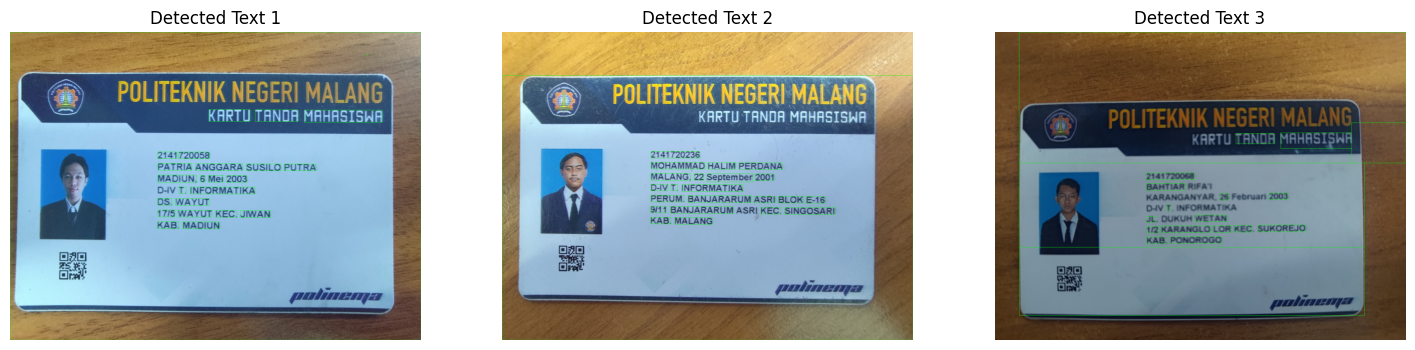


Detected images in folder: SamsungA32


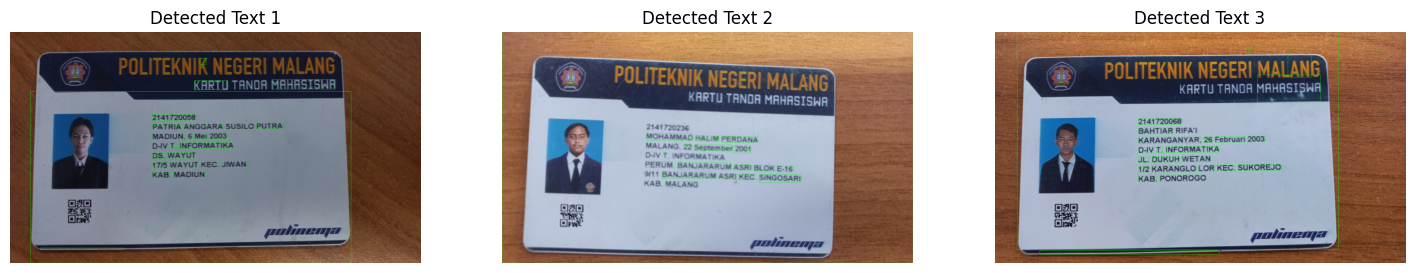

In [103]:
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    if os.path.isdir(folder_path):
        print(f"\nDetected images in folder: {folder_name}")

        plt.figure(figsize=(18, 6))

        for idx, filename in enumerate(os.listdir(folder_path)):
            file_path = os.path.join(folder_path, filename)
            original_image = cv2.imread(file_path)

            result_image = detect_and_draw_boxes(original_image)

            plt.subplot(1, 3, idx + 1)
            plt.imshow(result_image)
            plt.title(f'Detected Text {idx + 1}')
            plt.axis('off')

        plt.show()


Detected text in folder: InfinixHot11


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


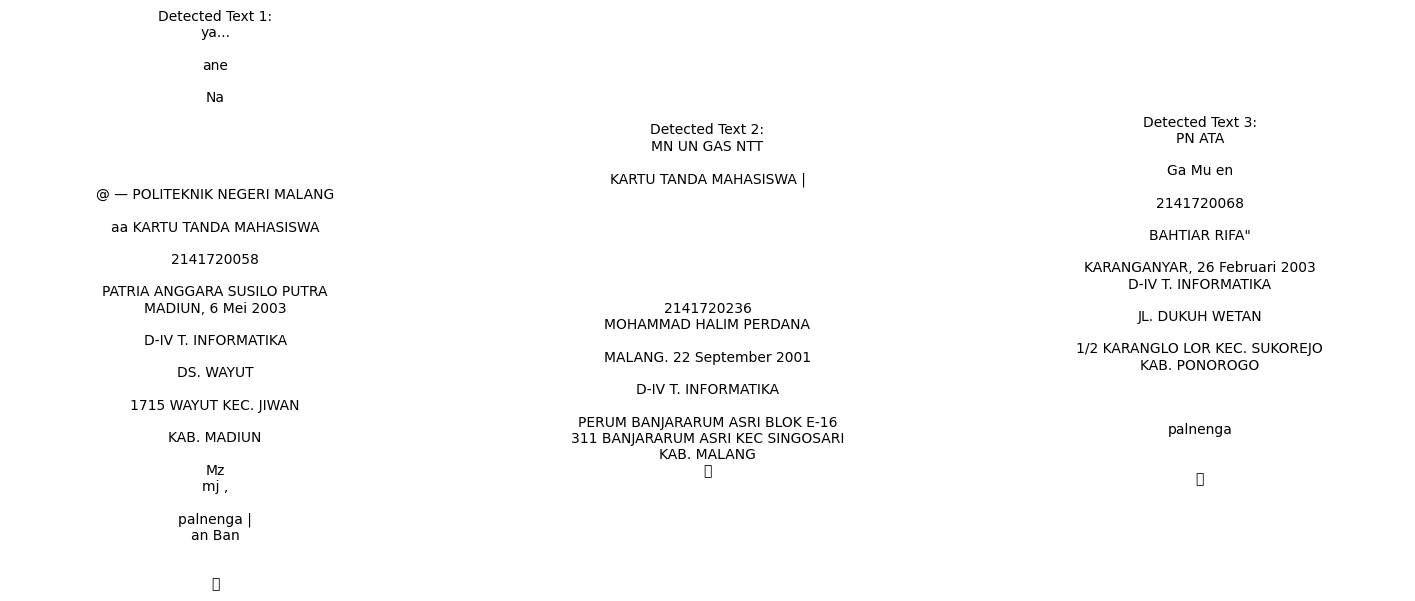


Detected text in folder: AsusZenfone9


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


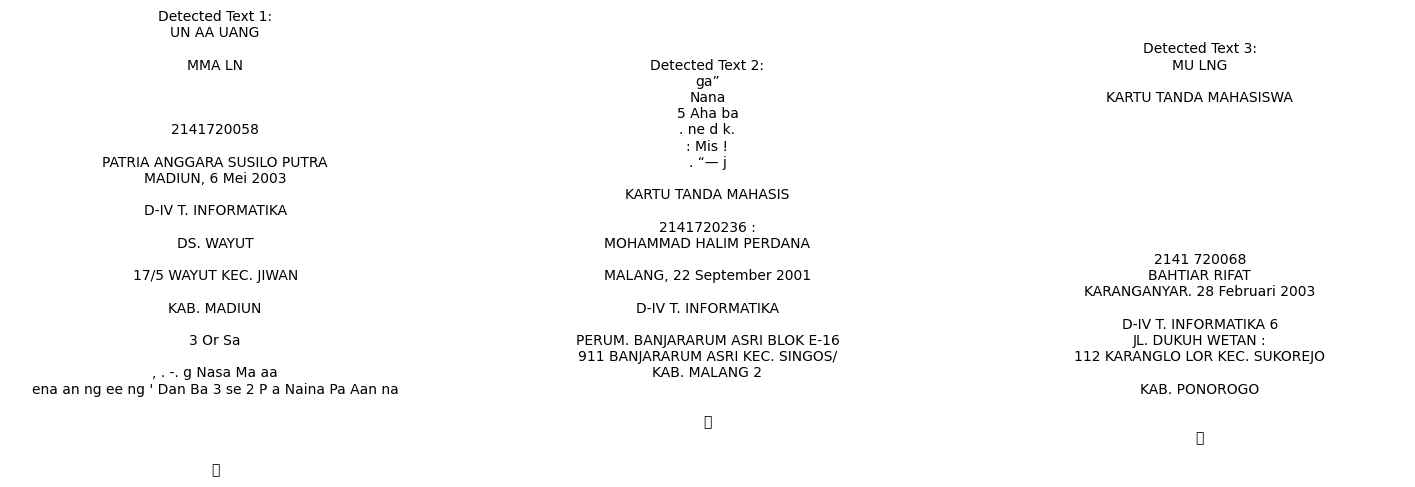


Detected text in folder: SamsungA32


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


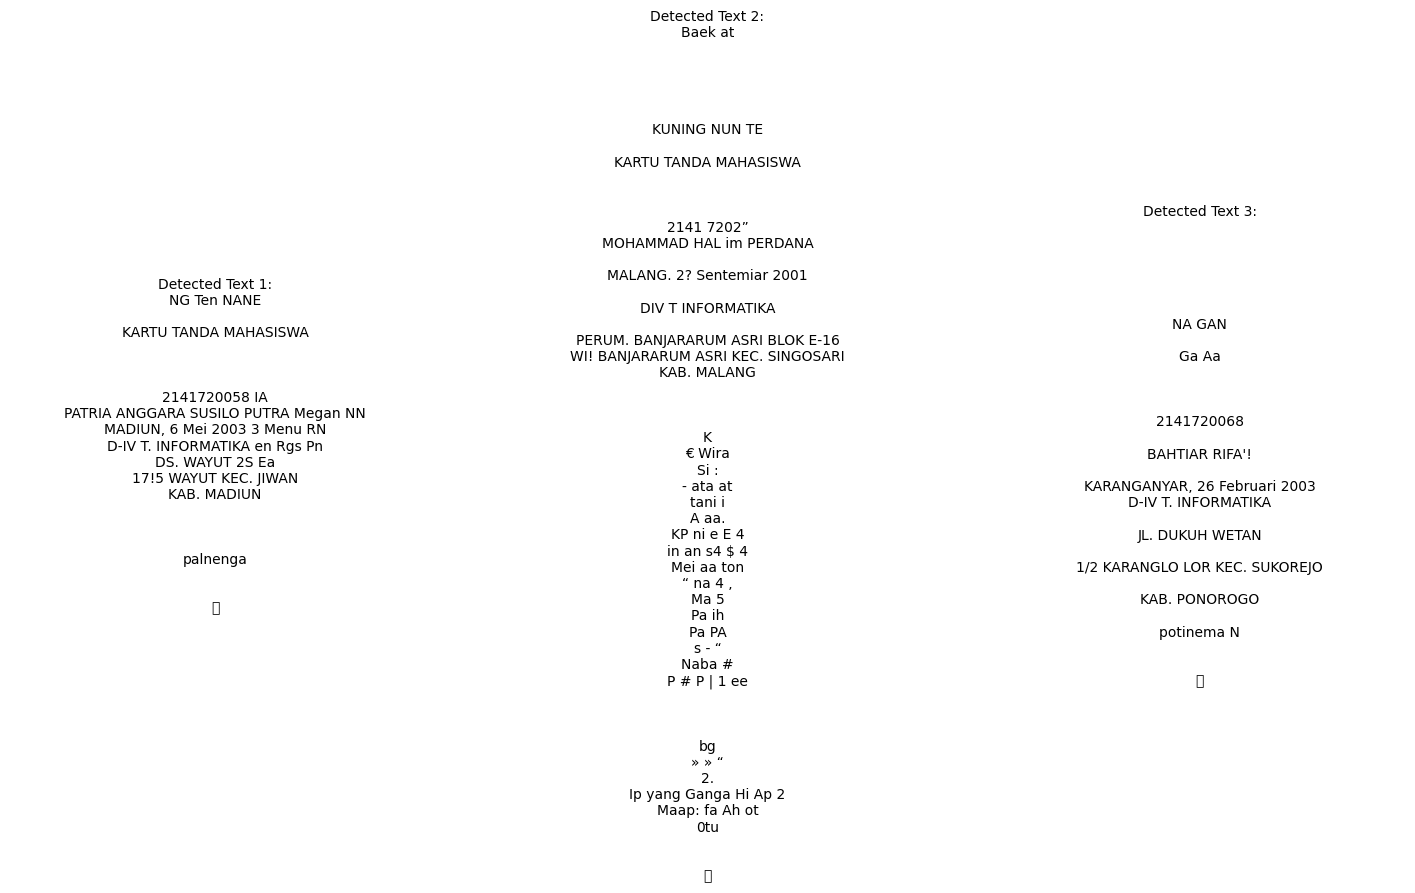

In [104]:
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    if os.path.isdir(folder_path):
        print(f"\nDetected text in folder: {folder_name}")

        # Inisialisasi subplot
        plt.figure(figsize=(18, 6))

        # Ambil semua file dalam folder dan ambil hanya 3 pertama
        images_in_folder = os.listdir(folder_path)[:3]

        # Loop untuk setiap file dalam folder
        for idx, filename in enumerate(images_in_folder):
            file_path = os.path.join(folder_path, filename)
            original_image = cv2.imread(file_path)

            # Lakukan deteksi teks
            detected_text = detect_text(original_image)

            # Tampilkan teks di dalam subplot
            plt.subplot(1, 3, idx + 1)
            plt.text(0.5, 0.5, f'Detected Text {idx + 1}:\n{detected_text}',
                     color='black', backgroundcolor='white',
                     transform=plt.gca().transAxes,
                     verticalalignment='center', horizontalalignment='center')
            plt.axis('off')

        plt.show()
